In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import numpy as np
import numpy.linalg as la

import pickle

# from functools import partial
# from itertools import product
from math import ceil
# import warnings

In [2]:
def find_cusps(zs, h, d2_max):
    d2z = (zs[:-2] - 2*zs[1:-1] + zs[2:])/h**2
    cusp_indices = [int(i)+1 for i in np.where(np.abs(d2z)>d2_max)[0]]
    if cusp_indices == []:
        return []
    else:
        return merge_cusps(cusp_indices)
    
def merge_cusps(index_list):
    ret_list = [index_list[0]]
    for index in index_list[1:]:
        if index-1 == ret_list[-1]:
            ret_list[-1] = (ret_list[-1], index)
        else:
            ret_list.append(index)
    return ret_list

def cusp_loc(index, xs):
    if type(index) is int:
        return xs[index]
    else:
        return sum(xs[i] for i in index)/2
    
def cusp_maker(f,g, c=0):
    return lambda xs: np.heaviside(c-xs, .5)*(f(xs) - f(c)) + np.heaviside(xs-c, .5)*(g(xs) - g(c))

In [3]:
f = lambda x: np.cos(x)
g = lambda x: 2*np.sin(2*x)

a, b = -5, 5
n = 801
errors = []
for c in np.linspace(-1, 1, 101):
    #c = .69757
    xs = np.linspace(a, b, n)
    h = (b-a)/(n-1)
    zs = cusp_maker(f,g,c)(xs)

    d2_max = 20

    cusp_indices = find_cusps(zs, h, d2_max)
    errors += [ (cusp_loc(index, xs)-c)/h for index in cusp_indices] 
print(max(abs(e) for e in errors))

0.3999999999999737


In [4]:
a, b = -5, 10
n = 1601

cs = [-3, 1, 7]
max_d2 = 25

foos = [
    lambda x: np.sin(4*x),
    lambda x: np.cos(3*x),
    lambda x: np.sin(3*x) - np.cos(2*x),
    lambda x: np.cos(x)*np.sin(x)
]

foo = foos[0]
for f, c in zip(foos[1:], cs):
    foo = cusp_maker(foo, f, c)
    
xs = np.linspace(a, b, n)
h = (b-a)/(n-1)

zs = foo(xs)
cusp_indices = find_cusps(zs, h, max_d2)

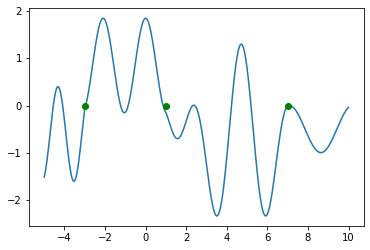

In [5]:
plt.plot(xs, zs)
plt.plot([cusp_loc(index, xs) for index in cusp_indices], [0]*len(cusp_indices), 'go')